## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  27.609979   402.807891  0.162283  3.001690  1.189928
1  48.474161  1246.713767  0.953537  4.452641  1.693531
2  66.238353  1007.810715  0.873851  8.437168  1.496144
3  38.138098  1277.445450  0.454028  2.805090  1.520381
4  33.065650   709.743971  0.173053  3.862870  1.404215


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0737945	total: 69.5ms	remaining: 1m 9s
1:	learn: 1.0659357	total: 70.1ms	remaining: 35s
2:	learn: 1.0544245	total: 70.7ms	remaining: 23.5s
3:	learn: 1.0458952	total: 71.3ms	remaining: 17.7s
4:	learn: 1.0350176	total: 71.8ms	remaining: 14.3s
5:	learn: 1.0281166	total: 72.2ms	remaining: 12s
6:	learn: 1.0185836	total: 72.7ms	remaining: 10.3s
7:	learn: 1.0081049	total: 73.2ms	remaining: 9.08s
8:	learn: 0.9978486	total: 73.8ms	remaining: 8.13s
9:	learn: 0.9873959	total: 74.3ms	remaining: 7.36s
10:	learn: 0.9795152	total: 74.8ms	remaining: 6.73s
11:	learn: 0.9685402	total: 75.3ms	remaining: 6.2s
12:	learn: 0.9598310	total: 75.9ms	remaining: 5.76s
13:	learn: 0.9522504	total: 76.3ms	remaining: 5.38s
14:	learn: 0.9420658	total: 76.8ms	remaining: 5.04s
15:	learn: 0.9338441	total: 77.2ms	remaining: 4.75s
16:	learn: 0.9263948	total: 77.7ms	remaining: 4.49s
17:	learn: 0.9196489	total: 78.1ms	remaining: 4.26s
18:	learn: 0.9106400	total: 78.5ms	remaining: 4.0

114:	learn: 0.4390571	total: 118ms	remaining: 908ms
115:	learn: 0.4360156	total: 118ms	remaining: 901ms
116:	learn: 0.4332963	total: 119ms	remaining: 896ms
117:	learn: 0.4309145	total: 119ms	remaining: 890ms
118:	learn: 0.4275685	total: 120ms	remaining: 885ms
119:	learn: 0.4251410	total: 120ms	remaining: 880ms
120:	learn: 0.4227576	total: 120ms	remaining: 875ms
121:	learn: 0.4204575	total: 121ms	remaining: 869ms
122:	learn: 0.4177731	total: 121ms	remaining: 864ms
123:	learn: 0.4147025	total: 122ms	remaining: 859ms
124:	learn: 0.4122048	total: 122ms	remaining: 855ms
125:	learn: 0.4093434	total: 123ms	remaining: 850ms
126:	learn: 0.4069912	total: 123ms	remaining: 845ms
127:	learn: 0.4049316	total: 123ms	remaining: 840ms
128:	learn: 0.4019095	total: 124ms	remaining: 835ms
129:	learn: 0.3994145	total: 124ms	remaining: 830ms
130:	learn: 0.3964553	total: 124ms	remaining: 825ms
131:	learn: 0.3936707	total: 125ms	remaining: 821ms
132:	learn: 0.3915584	total: 125ms	remaining: 816ms
133:	learn: 

269:	learn: 0.2101363	total: 186ms	remaining: 504ms
270:	learn: 0.2095408	total: 187ms	remaining: 503ms
271:	learn: 0.2086510	total: 187ms	remaining: 501ms
272:	learn: 0.2080356	total: 188ms	remaining: 500ms
273:	learn: 0.2074185	total: 188ms	remaining: 498ms
274:	learn: 0.2066657	total: 188ms	remaining: 497ms
275:	learn: 0.2057395	total: 189ms	remaining: 495ms
276:	learn: 0.2054080	total: 189ms	remaining: 494ms
277:	learn: 0.2048386	total: 190ms	remaining: 493ms
278:	learn: 0.2035986	total: 190ms	remaining: 491ms
279:	learn: 0.2029345	total: 190ms	remaining: 489ms
280:	learn: 0.2024196	total: 191ms	remaining: 488ms
281:	learn: 0.2020351	total: 191ms	remaining: 487ms
282:	learn: 0.2013634	total: 191ms	remaining: 485ms
283:	learn: 0.2005694	total: 192ms	remaining: 484ms
284:	learn: 0.1997916	total: 192ms	remaining: 482ms
285:	learn: 0.1993030	total: 193ms	remaining: 481ms
286:	learn: 0.1982261	total: 193ms	remaining: 480ms
287:	learn: 0.1976084	total: 193ms	remaining: 478ms
288:	learn: 

535:	learn: 0.0929116	total: 299ms	remaining: 259ms
536:	learn: 0.0926187	total: 300ms	remaining: 258ms
537:	learn: 0.0922770	total: 300ms	remaining: 258ms
538:	learn: 0.0921872	total: 301ms	remaining: 257ms
539:	learn: 0.0918558	total: 301ms	remaining: 256ms
540:	learn: 0.0918122	total: 301ms	remaining: 256ms
541:	learn: 0.0915336	total: 302ms	remaining: 255ms
542:	learn: 0.0914505	total: 302ms	remaining: 254ms
543:	learn: 0.0910525	total: 303ms	remaining: 254ms
544:	learn: 0.0907699	total: 303ms	remaining: 253ms
545:	learn: 0.0906832	total: 303ms	remaining: 252ms
546:	learn: 0.0904116	total: 304ms	remaining: 252ms
547:	learn: 0.0900244	total: 304ms	remaining: 251ms
548:	learn: 0.0899440	total: 305ms	remaining: 250ms
549:	learn: 0.0896315	total: 305ms	remaining: 250ms
550:	learn: 0.0892536	total: 305ms	remaining: 249ms
551:	learn: 0.0891697	total: 306ms	remaining: 248ms
552:	learn: 0.0888576	total: 306ms	remaining: 248ms
553:	learn: 0.0885518	total: 307ms	remaining: 247ms
554:	learn: 

693:	learn: 0.0668869	total: 368ms	remaining: 162ms
694:	learn: 0.0667647	total: 368ms	remaining: 162ms
695:	learn: 0.0666935	total: 369ms	remaining: 161ms
696:	learn: 0.0666425	total: 369ms	remaining: 160ms
697:	learn: 0.0664399	total: 369ms	remaining: 160ms
698:	learn: 0.0664211	total: 370ms	remaining: 159ms
699:	learn: 0.0663005	total: 370ms	remaining: 159ms
700:	learn: 0.0662820	total: 371ms	remaining: 158ms
701:	learn: 0.0662637	total: 371ms	remaining: 158ms
702:	learn: 0.0662136	total: 371ms	remaining: 157ms
703:	learn: 0.0657845	total: 372ms	remaining: 156ms
704:	learn: 0.0655764	total: 372ms	remaining: 156ms
705:	learn: 0.0655584	total: 372ms	remaining: 155ms
706:	learn: 0.0654181	total: 373ms	remaining: 155ms
707:	learn: 0.0652811	total: 373ms	remaining: 154ms
708:	learn: 0.0650871	total: 374ms	remaining: 153ms
709:	learn: 0.0650696	total: 374ms	remaining: 153ms
710:	learn: 0.0648697	total: 374ms	remaining: 152ms
711:	learn: 0.0645621	total: 375ms	remaining: 152ms
712:	learn: 

954:	learn: 0.0370301	total: 481ms	remaining: 22.7ms
955:	learn: 0.0369616	total: 481ms	remaining: 22.2ms
956:	learn: 0.0368777	total: 482ms	remaining: 21.7ms
957:	learn: 0.0368348	total: 482ms	remaining: 21.1ms
958:	learn: 0.0367415	total: 483ms	remaining: 20.6ms
959:	learn: 0.0366332	total: 483ms	remaining: 20.1ms
960:	learn: 0.0365664	total: 483ms	remaining: 19.6ms
961:	learn: 0.0364853	total: 484ms	remaining: 19.1ms
962:	learn: 0.0364670	total: 484ms	remaining: 18.6ms
963:	learn: 0.0363565	total: 485ms	remaining: 18.1ms
964:	learn: 0.0362180	total: 485ms	remaining: 17.6ms
965:	learn: 0.0361999	total: 486ms	remaining: 17.1ms
966:	learn: 0.0361821	total: 486ms	remaining: 16.6ms
967:	learn: 0.0360592	total: 486ms	remaining: 16.1ms
968:	learn: 0.0359805	total: 487ms	remaining: 15.6ms
969:	learn: 0.0359629	total: 487ms	remaining: 15.1ms
970:	learn: 0.0358558	total: 487ms	remaining: 14.6ms
971:	learn: 0.0358383	total: 488ms	remaining: 14.1ms
972:	learn: 0.0357194	total: 489ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


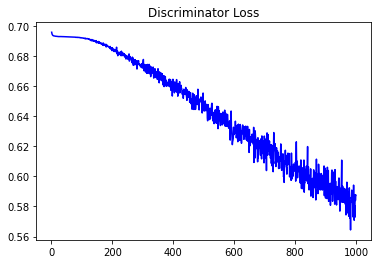

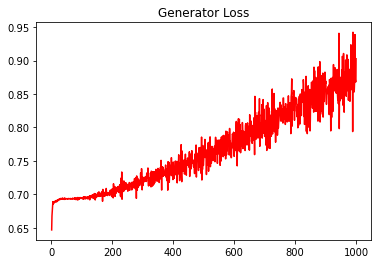

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07292085794133965


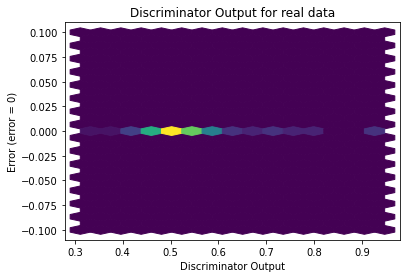

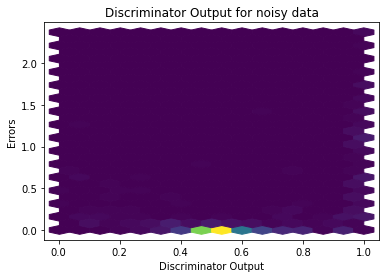

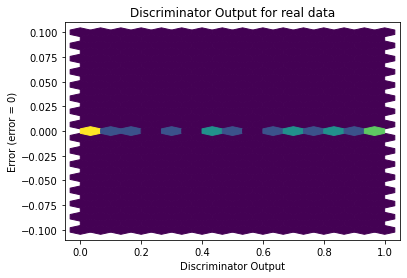

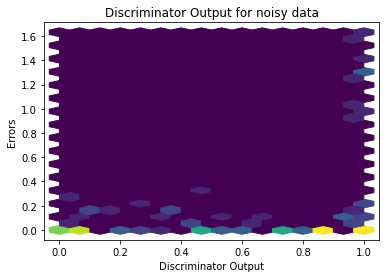

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
